In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#agosto13 = pd.read_csv('1308.csv')
#septiembre13 = pd.read_csv('1309.csv')
#octubre13 = pd.read_csv('1310.csv')
#noviembre13 = pd.read_csv('1311.csv')
#diciembre13 = pd.read_csv('1312.csv')
#enero14 = pd.read_csv('1401.csv')
#febrero14 = pd.read_csv('1402.csv')
#marzo14 = pd.read_csv('1403.csv')
#abril14 = pd.read_csv('1404.csv')
#mayo14 = pd.read_csv('1405.csv')
#junio14 = pd.read_csv('1406.csv')
#enero15 = pd.read_csv('1501.csv')
#agosto15 = pd.read_csv('1508.csv')
#marzo16 = pd.read_csv('1603.csv')
#abril16 = pd.read_csv('1604.csv')
#mayo16 = pd.read_csv('1605.csv')
#junio16 = pd.read_csv('1606.csv')
#enero17 = pd.read_csv('1701.csv')
#agosto17 = pd.read_csv('1708.csv')


agosto13 = pd.read_csv('resources/properati-AR-2013-08-01-properties-sell.csv')
septiembre13 = pd.read_csv('resources/properati-AR-2013-09-01-properties-sell.csv')
octubre13 = pd.read_csv('resources/properati-AR-2013-10-01-properties-sell.csv')
noviembre13 = pd.read_csv('resources/properati-AR-2013-11-01-properties-sell.csv')
diciembre13 = pd.read_csv('resources/properati-AR-2013-12-01-properties-sell.csv')
enero14 = pd.read_csv('resources/properati-AR-2014-01-01-properties-sell.csv')
febrero14 = pd.read_csv('resources/properati-AR-2014-02-01-properties-sell.csv')
marzo14 = pd.read_csv('resources/properati-AR-2014-03-01-properties-sell.csv')
abril14 = pd.read_csv('resources/properati-AR-2014-04-01-properties-sell.csv')
mayo14 = pd.read_csv('resources/properati-AR-2014-05-01-properties-sell.csv')
junio14 = pd.read_csv('resources/properati-AR-2014-06-01-properties-sell.csv')
enero15 = pd.read_csv('resources/properati-AR-2015-01-01-properties-sell-six_months.csv')
agosto15 = pd.read_csv('resources/properati-AR-2015-08-01-properties-sell-six_months.csv')
marzo16 = pd.read_csv('resources/properati-AR-2016-03-01-properties-sell-six_months.csv')
abril16 = pd.read_csv('resources/properati-AR-2016-04-01-properties-sell.csv')
mayo16 = pd.read_csv('resources/properati-AR-2016-05-01-properties-sell.csv')
junio16 = pd.read_csv('resources/properati-AR-2016-06-01-properties-sell.csv')
enero17 = pd.read_csv('resources/properati-AR-2017-07-01-properties-sell-six_months.csv')
agosto17 = pd.read_csv('resources/properati-AR-2017-08-01-properties-sell.csv')


datos = pd.concat([agosto13, septiembre13, octubre13, noviembre13, diciembre13, enero14, febrero14, \
                          marzo14, abril14, mayo14, junio14, enero15, agosto15, marzo16, abril16, mayo16, \
                          junio16, enero17, agosto17])

#datosForTesting = pd.read_csv('properati_dataset_testing_noprice.csv')

datosForTesting = pd.read_csv('resources/properati_dataset_testing_noprice.csv')

In [145]:
datosForTesting.count()

id                         14166
created_on                 14166
property_type              14166
operation                  14166
place_name                 14166
place_with_parent_names    14166
country_name               14166
state_name                 14166
lat-lon                    10487
lat                        10487
lon                        10487
surface_total_in_m2        11853
surface_covered_in_m2      13005
floor                       1368
rooms                       7500
expenses                    2543
description                14166
dtype: int64

Algunos primeros datos del set a testear. Vemos que los únicos campos con bajo porcentaje de datos son el piso y las expensas.

In [146]:
datos = datos.loc[:, ['id', 'created_on',  'property_type', 'operation', 'place_name', \
                      'place_with_parent_names', 'country_name', 'state_name', 'lat-lon', 'lat', 'lon', \
                     'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms', 'expenses', 'description',\
                     'price_aprox_usd']]
datos.columns

Index(['id', 'created_on', 'property_type', 'operation', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'lat-lon',
       'lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor',
       'rooms', 'expenses', 'description', 'price_aprox_usd'],
      dtype='object')

In [5]:
#print datosForTesting.operation.unique()
print(datosForTesting.operation.unique())

['venta' 'alquiler']


In [147]:
datosForTesting.loc[datosForTesting.operation == 'alquiler','id'].count()

1

In [8]:
#print datos.operation.unique()
print(datos.operation.unique())

['sell']


In [148]:
datos['operation'] = datos['operation'].map(lambda x: 'venta' if x == 'sell' else 'alquiler')
datos.loc[datos.operation == 'venta', 'id'].count()

481573

In [11]:
#print datosForTesting.property_type.unique()
print(datosForTesting.property_type.unique())

['departamento' 'ph' 'casa']


In [13]:
datosForTesting.loc[datosForTesting.property_type == 'departamento', 'id'].count()

9761

In [14]:
#print datos.property_type.unique()
print(datos.property_type.unique())

['house' 'apartment' 'PH' 'store']


In [15]:
datos = datos.loc[datos.property_type != 'store', :]
datos.count()

id                          465972
created_on                 1185654
property_type              1185654
operation                  1185654
place_name                 1185587
place_with_parent_names    1185654
country_name                465972
state_name                  465972
lat-lon                     985741
lat                         985741
lon                         985730
surface_total_in_m2         310527
surface_covered_in_m2       376151
floor                       158864
rooms                       830826
expenses                     58524
description                 465951
price_aprox_usd             983714
dtype: int64

In [149]:
def traducirTipoPropiedad(x):
    tipo = ''
    if (x == 'house'):
        tipo = 'casa' 
    else:
        if (x == 'apartment'): 
            tipo = 'departamento'
        else: 
            if (x == 'PH'): 
                tipo = 'ph'
    return tipo

In [150]:
datos['property_type'] = datos['property_type'].map(traducirTipoPropiedad)
datos.loc[datos.property_type == 'casa','id'].count()

177850

In [19]:
#print datosForTesting.surface_total_in_m2.min()
print(datosForTesting.surface_total_in_m2.min())

0.0


In [16]:
print(datosForTesting.surface_total_in_m2.max()

148000.0


In [20]:
print(datos.loc[datos.surface_total_in_m2 > 150000, 'id'].count())

14


In [18]:
print datosForTesting.state_name.unique()

['Capital Federal' 'Buenos Aires Interior' 'Bs.As. G.B.A. Zona Sur'
 'Bs.As. G.B.A. Zona Oeste' 'Bs.As. G.B.A. Zona Norte']


In [18]:
print datosForTesting.loc[datosForTesting.state_name == 'Buenos Aires Interior', 'id'].count()

1


In [19]:
print datos.state_name.unique()

[nan 'Buenos Aires Interior' 'R\xc3\xado Negro' 'Capital Federal'
 'Buenos Aires Costa Atl\xc3\xa1ntica' 'Neuqu\xc3\xa9n' 'San Juan'
 'Bs.As. G.B.A. Zona Norte' 'Bs.As. G.B.A. Zona Sur'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Santa Fe' 'San Luis'
 'C\xc3\xb3rdoba' 'Entre R\xc3\xados' 'La Pampa' 'Salta' 'Tucum\xc3\xa1n'
 'Mendoza' 'Corrientes' 'Chaco' 'Jujuy' 'Catamarca' 'La Rioja' 'Chubut'
 'Formosa' 'Tierra Del Fuego' 'Santa Cruz' 'Santiago Del Estero']


In [155]:
datos = datos.loc[(datos['state_name'].str.contains('Capital Federal')| \
                   datos['state_name'].str.contains('Bs.As. G.B.A. Zona Sur')|\
                  datos['state_name'].str.contains('Bs.As. G.B.A. Zona Oeste')|\
                  datos['state_name'].str.contains('Bs.As. G.B.A. Zona Norte')),:]
datos.count()

id                         331901
created_on                 331901
property_type              331901
operation                  331901
place_name                 331834
place_with_parent_names    331901
country_name               331901
state_name                 331901
lat-lon                    230063
lat                        230063
lon                        230063
surface_total_in_m2        236629
surface_covered_in_m2      287081
floor                       40705
rooms                      170526
expenses                    37314
description                331886
price_aprox_usd            302554
dtype: int64

In [156]:
datos = datos.loc[datos['price_aprox_usd'].notnull(),:]
datos = datos.loc[datos['price_aprox_usd'] != 0,:]
datos.count()

id                         290843
created_on                 290843
property_type              290843
operation                  290843
place_name                 290777
place_with_parent_names    290843
country_name               290843
state_name                 290843
lat-lon                    200187
lat                        200187
lon                        200187
surface_total_in_m2        209791
surface_covered_in_m2      259383
floor                       38560
rooms                      146382
expenses                    35614
description                290828
price_aprox_usd            290843
dtype: int64

In [157]:
#Se hace la comparacion por lat, lon, superficie y superficie cubierta, tengo que quitar los nulls de esos campos
datosSinNull = datos.loc[datos['lat'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['lon'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_total_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_covered_in_m2'].notnull(),:]

#Luego de esos divido los que estan en palermo de los que no estan en palermo
datosPalermo = datosSinNull.loc[datosSinNull.place_name == 'Palermo', :]
datosNoPalermo = datosSinNull.loc[datosSinNull.place_name != 'Palermo', :]

#Divido al set de palermo en otros features y precios
datosPalermoFeatures = datosPalermo.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosPalermoPrecio = datosPalermo.loc[:, ['price_aprox_usd']]

#Divido al set que no es de palermo en otros features y precios
datosNoPalermoFeatures = datosNoPalermo.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosNoPalermoPrecio = datosNoPalermo.loc[:, ['price_aprox_usd']]

In [158]:
#Importo todas las librerias correspondientes a ML
#Para score
from sklearn.metrics import r2_score

#Para training y cross
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#Algoritmos
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn import gaussian_process
from sklearn import neural_network

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


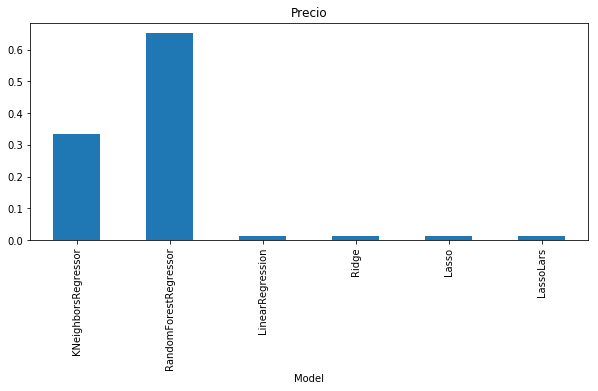

In [175]:
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         #RadiusNeighborsRegressor(),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1)]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(datosNoPalermoFeatures, datosNoPalermoPrecio)
        tmp['Precio'] = r2_score(datosPalermoPrecio, model.predict(datosPalermoFeatures))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optim

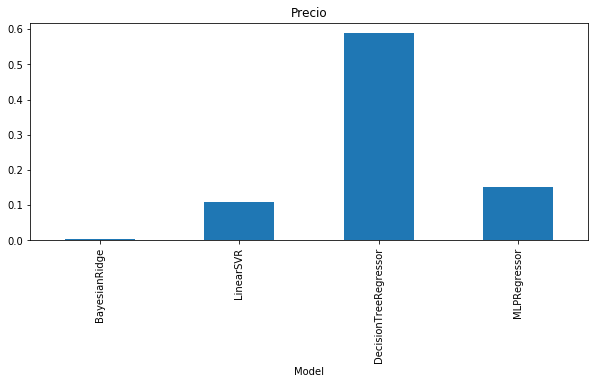

In [28]:
models = [linear_model.BayesianRidge(),
         #LogisticRegression(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         #gaussian_process.GaussianProcessRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(datosNoPalermoFeatures, datosNoPalermoPrecio)
        tmp['Precio'] = r2_score(datosPalermoPrecio, model.predict(datosPalermoFeatures))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

In [176]:
#Split del set de datos prueba 1
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)

In [177]:
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


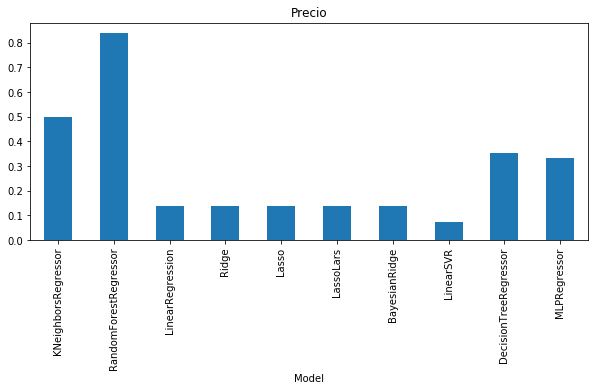

In [178]:
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

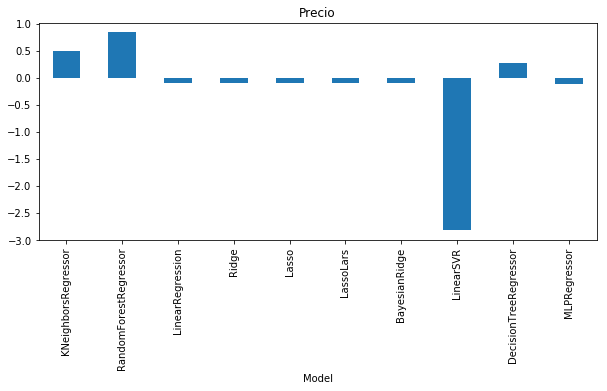

In [32]:
#Prueba 2
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


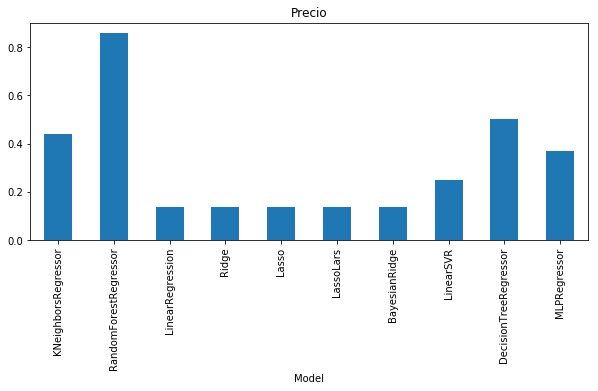

In [179]:
#Prueba 3
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

In [33]:
datosFiltradosFeatures = datosFiltrados.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosFiltradosPrecios = datosFiltrados.loc[:, ['price_aprox_usd']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.39237995,  0.91701864,  0.88376643,  0.78635228,  0.82133644])

In [50]:
RFRModel = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.2584208 ,  0.91204237,  0.77484542,  0.66607409,  0.63041404])

In [48]:
RFRModel = RandomForestRegressor()
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.25138166,  0.88470325,  0.59708272,  0.67097637,  0.60537916])

In [49]:
RFRModel = RandomForestRegressor(n_estimators=50, max_features=2)
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.31663359,  0.90991187,  0.79368348,  0.74809686,  0.63274897])

In [54]:
#primera estimacion al set de prueba
primeraPrueba = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

In [61]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(primeraPrueba)

array([[ -34.61098776,  -58.36346358,    0.        ,   64.        ],
       [ -34.612651  ,  -58.4432756 ,    0.        ,   64.        ],
       [ -34.58936332,  -58.41287986,   53.        ,   48.        ],
       ..., 
       [ -34.7585252 ,  -58.4097202 ,  219.        ,  135.        ],
       [ -34.56322108,  -58.46105268,   62.        ,   48.        ],
       [ -34.70919169,  -58.53028938,  367.        ,  130.        ]])

In [68]:
x_train, x_test, y_train, y_test = train_test_split(datosFiltrados.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']], datosFiltrados['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba1 = RFRModel.predict(imp.fit_transform(primeraPrueba))
prueba1

array([ 307686.31166667,  159466.64      ,  185250.8197    , ...,
        167100.2048    ,  172813.33989524,  152105.        ])

In [79]:
archivo1 = pd.DataFrame()
archivo1['id'] = datosForTesting.loc[:,['id']]
archivo1['price_usd'] = prueba1
archivo1

,id,price_usd
0,3632,307686.311667
1,3633,159466.640000
2,2263404,185250.819700
3,2263405,83847.000000
4,2263406,141019.780741
5,2263407,83847.000000
6,2263408,83847.000000
7,2263409,83847.000000
8,2263410,139479.400000
9,2263411,109333.665000


In [85]:
archivo1.to_csv('prueba1.csv', index=False)

In [86]:
aVer = pd.read_csv('prueba1.csv')
aVer

,id,price_usd
0,3632,307686.311667
1,3633,159466.640000
2,2263404,185250.819700
3,2263405,83847.000000
4,2263406,141019.780741
5,2263407,83847.000000
6,2263408,83847.000000
7,2263409,83847.000000
8,2263410,139479.400000
9,2263411,109333.665000


#  Prueba Incluyendo lugares

In [168]:
#Creamos un place_name_id para agregar a la query
barrios = pd.concat([pd.DataFrame([[barrio,0]], columns=['place_name','place_name_id']) for barrio in datosSinNull['place_name'].unique()]).reset_index()
barrios['place_name_id'] = barrios.index
barrios = barrios.loc[:,['place_name','place_name_id']]
barrios.head()

,place_name,place_name_id
0,Jose Marmol,0
1,Belgrano,1
2,Palermo Soho,2
3,Burzaco,3
4,Villa Devoto,4


In [203]:
datosWithPlaces = pd.merge(datosSinNull,barrios,how='left',on='place_name')

In [208]:
datosFiltradosWithPlaces = datosWithPlaces.loc[:, ['lat', 'lon','surface_covered_in_m2','surface_total_in_m2','price_aprox_usd','place_name_id']]

# Entrenamiento

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


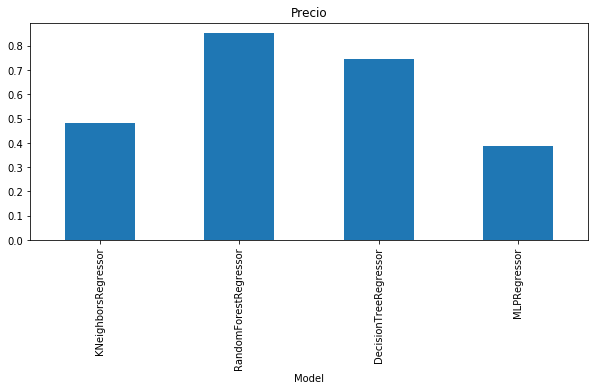

In [206]:
#Prueba 4

x_train, x_test, y_train, y_test = train_test_split(datosFiltradosWithPlaces, datosFiltradosWithPlaces['price_aprox_usd'], test_size=0.2)
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id']]
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')


In [207]:
datosFiltradosWithPlacesFeatures = datosFiltradosWithPlaces.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id']]
datosFiltradosWithPlacesPrecios = datosFiltradosWithPlaces.loc[:, ['price_aprox_usd']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

scores = cross_val_score(RFRModel, datosFiltradosWithPlacesFeatures, np.ravel(datosFiltradosWithPlacesPrecios), cv=5)

scores

array([ 0.42288672,  0.92579638,  0.88060466,  0.78343659,  0.80647233])

# Test con set de pruebas 

In [209]:
datosForTestingWithPlaces = pd.merge(datosForTesting,barrios,how='left',on='place_name')

In [210]:
segundaPrueba = datosForTestingWithPlaces.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id']]


imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(segundaPrueba)


RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

x_train, x_test, y_train, y_test = train_test_split(datosFiltradosWithPlace.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id']], datosFiltradosWithPlace['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba2 = RFRModel.predict(imp.fit_transform(segundaPrueba))


In [211]:
archivo2 = pd.DataFrame()
archivo2['id'] = datosForTesting.loc[:,['id']]
archivo2['price_usd'] = prueba2
archivo2.to_csv('prueba2.csv', index=False)